# **Actividad 2**

### **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Inteligencia Artificial y Aprendizaje Automático**
#### **Tecnológico de Monterrey**
##### **Prof Luis Eduardo Falcón Morales**

### **Nombre del estudiante: Carlos Humberto Galvan Perales**

### **Matrícula: A01797969**

**NOTAS:**

*   Esta actividad la puedes realizar en Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en el editor de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente debes modificar este archivo agregando tus líneas de código en las partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
misdatos = pd.read_csv("data/california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

**PREGUNTAS:**

*   **Pregunta 1.1.** Investiga cuál es la importancia del coeficiente de correlación de Pearson y cómo puede utilizarse durante el análisis de los datos de un problema.

*   **Pregunta 1.2.** El coeficiente de correlación de Pearson, ¿para qué tipo de variables lo podemos aplicar?  

*   **Pregunta 1.3.** Despliega la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par de variables. Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


### **Respuestas:**

*   **Respuesta 1.1.**

El coeficiente de correlación de Pearson es una medida estadistica que cuantifica la relación y "dirección" lineal entre dos variables.

- Calcula un valor numérico entre -1 y 1 que describe la correlación entre ambas variables, este número a su vez nos indica si tenemos una correlación positiva o negativa

- Nos permite explorar relaciones entre variables antes de realizar análisis a profundidad para identificar patrones, establecer hipótesis sobre relaciones causales

- En modelos predictivos, nos ayuda a identificar variables con alta colinearidad que podrían afectar la capacidad predictiva del modelo.

- Es importante considerar sus limitantes, entre ellas, solo mide relaciones lineales y preveer su sensibilidad a valores atípicos

*   **Respuesta 1.2.**

Se aplica exclusivamente a variables cuantitativas continuas. No es posible utilizar este coeficiente de correlación en variables ordinales o categóricas.


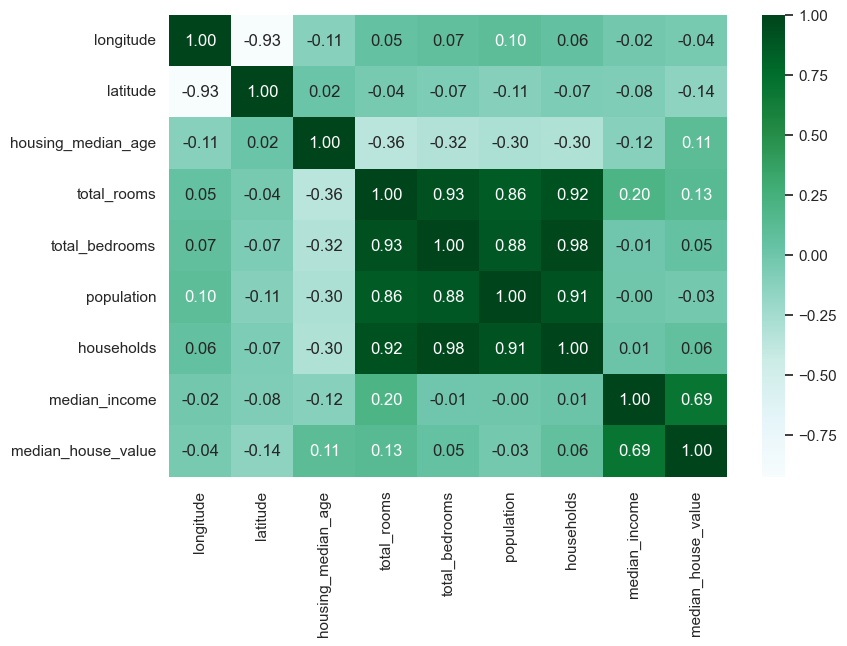

In [4]:
sns.set(rc={'figure.figsize':(9,6)})

corr_matrix = misdatos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt=".2f")

plt.show()

#**Ejercicio - 2: Transformaciones e Histogramas de variables**

**INSTRUCCIONES:**

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas variables les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Investiga y aplica Box-Cox con scikit-learn.


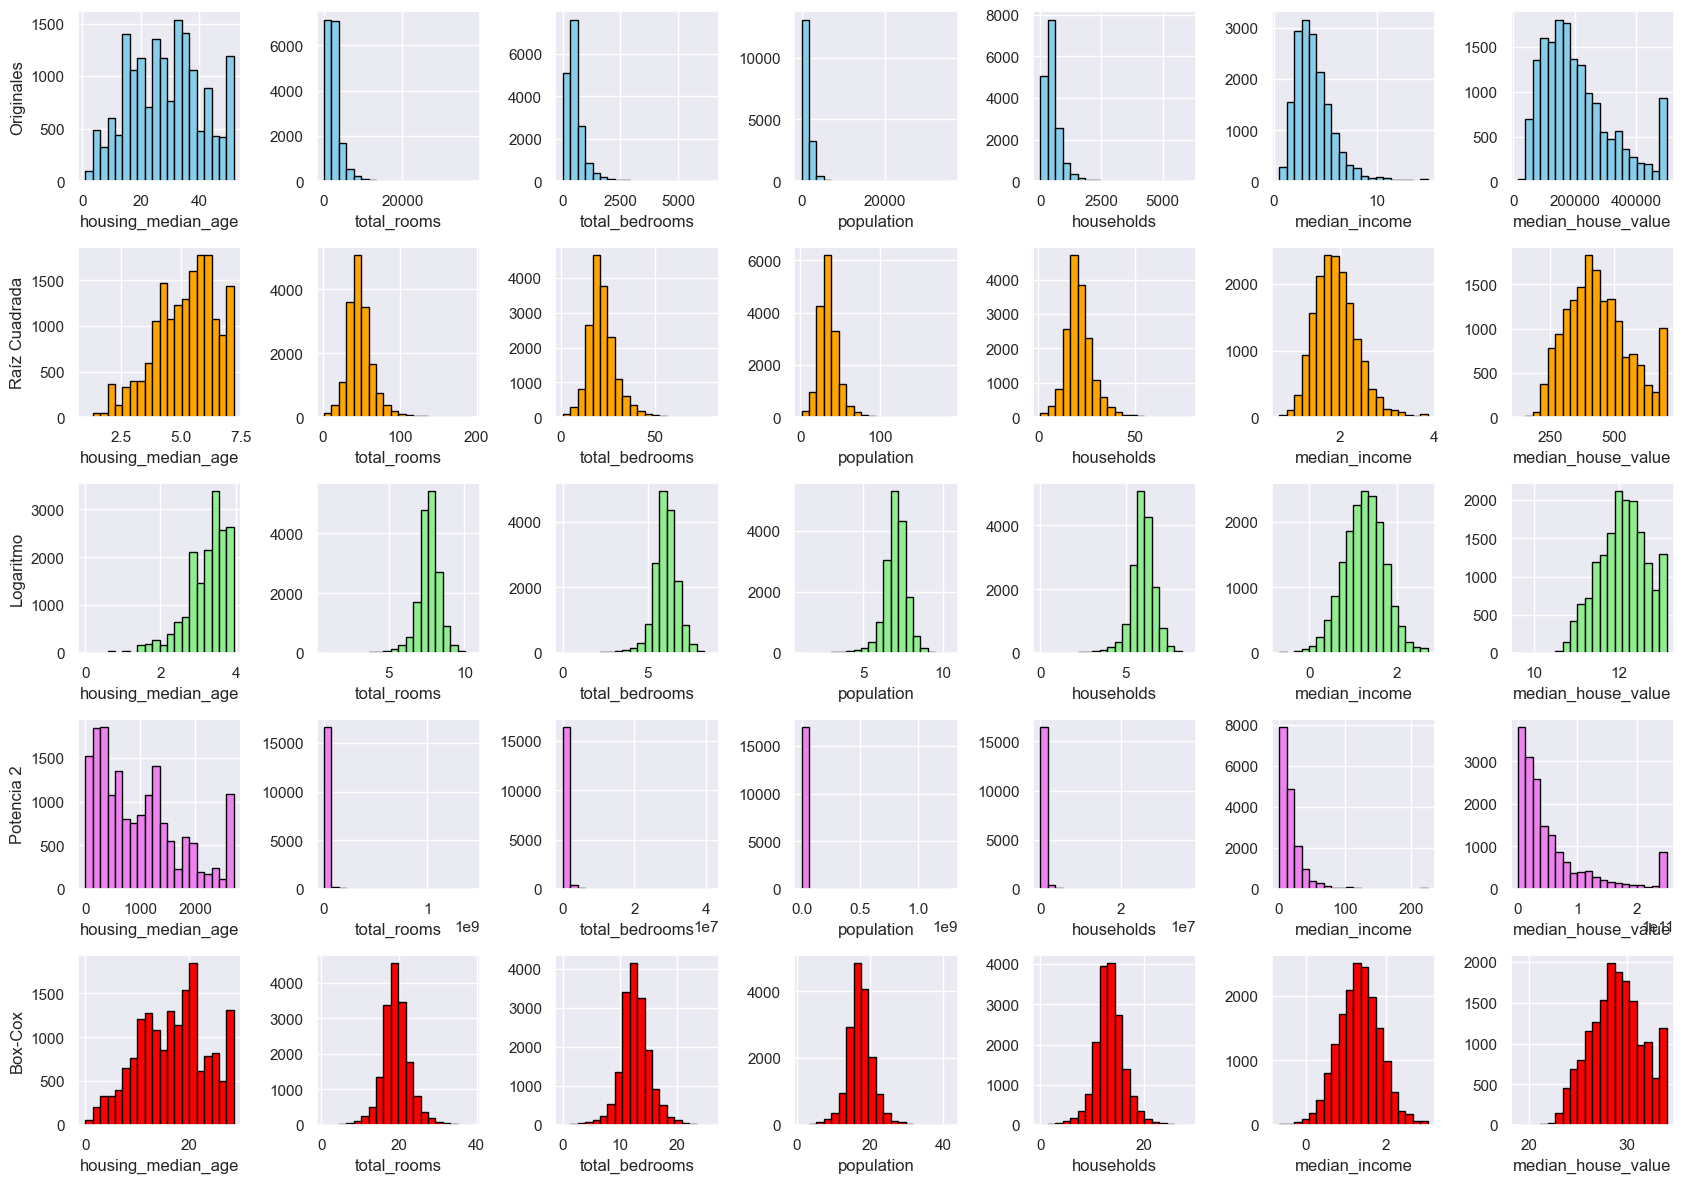

In [ ]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = misdatos[variables_a_transformar[k]].values  # Valores originales

    plt.hist(Transf0, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Originales')

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]].values)

    plt.hist(Transf1, bins=20, color='orange', edgecolor='black')
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Raíz Cuadrada')

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)

    # Para evitar log(0) si hay valores cero 
    Transf2 = np.log(misdatos[variables_a_transformar[k]].values + 1e-6)  

    plt.hist(Transf2, bins=20, color='lightgreen', edgecolor='black')
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Logaritmo')

    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(misdatos[variables_a_transformar[k]].values, 2)

    plt.hist(Transf3, bins=20, color='violet', edgecolor='black')
    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Potencia 2')

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    datos = misdatos[variables_a_transformar[k]].values
    datos_boxcox = datos[datos > 0]
    if len(datos_boxcox) > 0:
        # Box-Cox con power_transform
        boxcox_result = power_transform(datos_boxcox.reshape(-1, 1), method='box-cox', standardize=False)
        Transf4 = np.empty_like(datos, dtype=float)
        Transf4[:] = np.nan
        Transf4[datos > 0] = boxcox_result.flatten()
        plt.hist(Transf4[~np.isnan(Transf4)], bins=20, color='red', edgecolor='black')
    else:
        plt.hist([], bins=20, color='red', edgecolor='black')  # Sin datos

    plt.xlabel(variables_a_transformar[k])
    if k==0:
        plt.ylabel('Box-Cox')

plt.tight_layout()
plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



**INSTRUCCIONES:**

En el archivo "MNA_IAyAA_semana_2_RLM_teoria_básica_2024.pdf" que se encuentra en Canvas se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [8]:
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función mi_RMSE:
def mi_RMSE(y, yhat):
    return np.sqrt(np.mean(np.square(y - yhat)))

# Incluye aquí las líneas de código que definan a la función mi_MAE:
def mi_MAE(y, yhat):
    return np.mean(np.abs(y - yhat))

# Incluye aquí las líneas de código que definan a la función mi_MAPE:
def mi_MAPE(y, yhat):
    return np.mean(np.abs((y - yhat) / y)) * 100

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################



In [9]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')



modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)


  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  66457.2 		49789.4  		30.5%
fold[2]:  66031.3 		49316.3  		30.4%
fold[3]:  69979.2 		51616.3  		30.6%
fold[4]:  71967.6 		52300.2  		30.9%
fold[5]:  68230.9 		50200.3  		29.6%
fold[6]:  71241.3 		52660.9  		31.2%
fold[7]:  68504.8 		50266.6  		31.0%
fold[8]:  69495.7 		49766.0  		29.1%
fold[9]:  68527.2 		50158.6  		29.2%
fold[10]:  69690.5 		50663.3  		29.7%
mean(std) 69012.6(1784.6)  	50673.8(1076.4)   	30.2% (0.7)


**\<\<Fin de la Actividad_1_Semana_2>>**